# Lab 5 - Clustering

In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

#libraries for regression analysis
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model


In this part you will use Python to create the `clusters` in the heart disease data set (the link and explanation is included here)<br><br>

<br>
<b>Heart Disease Dataset:</b> Here, is the link for heart disease dataset of patients. <a>http://archive.ics.uci.edu/ml/datasets/Heart+Disease</a> 
<br>
After going to this link you will find two folders: 
<li>One: Data Folder</li> 
<li>two: Dataset description.</li> </em> It is better to use processed cleveland data. 
<br>
<br>
In the dataset description folder, you will find the description about the columns’ names referring to the 14 column of the dataset as the following: <strong>The last one attribute (number 14) is the result. </strong> Include your R source code of regression analysis, training and generating results. Here are the example of attributes and their Information (please see data set documents for more details)

<ol>
<li> #3 (age) </li>
<li> #4 (sex) </li>
<li> #9 (cp) </li>
<li> #10 (trestbps)</li> 
<li> #12 (chol)</li>
<li> #16 (fbs) </li>
<li> #19 (restecg) </li>
<li> #32 (thalach) </li>
<li> #38 (exang) </li>
<li> #40 (oldpeak)</li>
</ol> .........
<li>13. #51 (thal)</li>  
<li>14. #58 (num)</li>  
<br>
--------------------------->result <br> 


Implement the following using python notebook and submit your source code with results. <br> Before you start, refer to the `clustering lecture notes` to understand how to create `k-means` and `agglomerative clusters` using a python library, how to find the right value of `“k”` for the k-means, and details about `silhouette score`.

In [303]:
#read in heart disease data
heartDiseaseData = pd.read_csv('heart-disease-dataset.csv')
heartDiseaseData.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Data Cleaning

In [304]:
print("Number of missing data:",heartDiseaseData.isna().any().sum())
print("Number of duplicate data:",heartDiseaseData.duplicated().sum())

Number of missing data: 0
Number of duplicate data: 0


In [305]:
heartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null float64
cp         303 non-null float64
tresbps    303 non-null float64
chol       303 non-null float64
fbs        303 non-null float64
restecg    303 non-null float64
thalach    303 non-null float64
exang      303 non-null float64
oldpeak    303 non-null float64
slope      303 non-null float64
ca         303 non-null object
thal       303 non-null object
result     303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [306]:
print(heartDiseaseData['ca'].unique())
print(heartDiseaseData['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [307]:
#replacing all the '?' to 0
heartDiseaseData = heartDiseaseData.replace('?',0)

#change object type to int
heartDiseaseData['thal'] = heartDiseaseData['thal'].astype(float)
heartDiseaseData['ca'] = heartDiseaseData['ca'].astype(float)

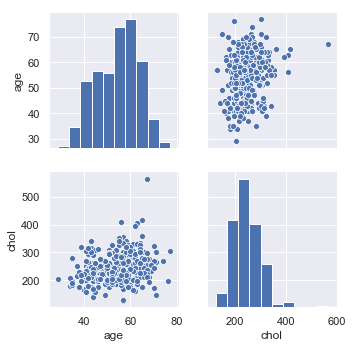

In [308]:
#Plot Age and Cholesterol Correlation
sb.pairplot(heartDiseaseData[['age','chol']])

In [309]:
heartDiseaseData.columns

Index(['age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'result'],
      dtype='object')

## 1.
Using the Python `“sklearn”` library, create and visualize the k-means clusters `(with k=5)` for the given heart disease dataset. For visualization, draw the scatter plot using the `age` and `cholesterol` features on each group of clusters. (2 marks)

In [310]:
from sklearn.cluster import KMeans 
#Column names
cols = heartDiseaseData.columns[1:]
kmeans = KMeans(n_clusters=5, init="k-means++")
kmeans = kmeans.fit(heartDiseaseData[['age','chol']])

# NOT SURE IF WE FIT ALL DATA OR DO WE FIT JUST TO THE WANTED COLS
#Predict the cluster from first patient down to all rows
#heartDiseaseData['cluster'] = cluster.fit_predict(heartDiseaseData[heartDiseaseData.columns[2:]])


In [311]:
heartDiseaseData['Clusters'] = kmeans.labels_

In [312]:
kmeans.cluster_centers_

array([[ 53.97058824, 227.75490196],
       [ 55.95918367, 314.83673469],
       [ 51.45454545, 185.72727273],
       [ 56.03703704, 267.17283951],
       [ 62.6       , 438.2       ]])

[Text(0.5, 1.0, 'K-means Clustering')]

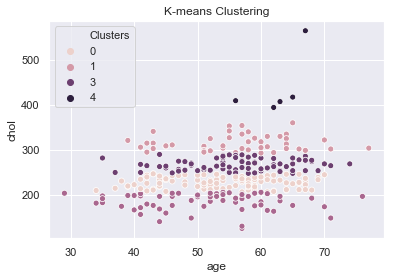

In [313]:
sb.scatterplot(x=heartDiseaseData['age'],y=heartDiseaseData['chol'],hue = 'Clusters',data=heartDiseaseData).set(title= 'K-means Clustering')

### Using matplotlib to plot

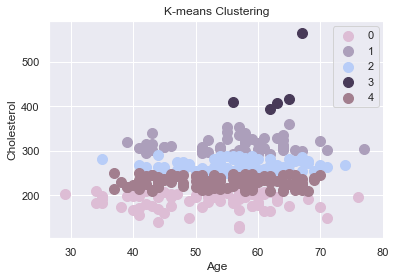

In [314]:
X = heartDiseaseData[['age','chol']].values
kmeans = KMeans(n_clusters = 5, init='k-means++')
y_kmeans = kmeans.fit_predict(X)
heartDiseaseData['Cluster'] = y_kmeans

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = '#DDBDD5',label ='0')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = '#AC9FBB',label ='1')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = '#B8CDF8',label ='2')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = '#483A58',label ='3')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = '#A27E8E',label ='4')
plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

<hr>

## 2.
Apply k-means clusters on the heart disease dataset with varying numbers of clusters from `1 to 10` and compute their corresponding `Sum of squared Error (SSE)` value. Plot the graph using Python `“matplotlib”` library and estimate the right `“k”` value. <br><br>
Hint:
- The `“elbow”` in the plot of `SSE` vs the number of clusters can help to estimate `“k”` value
-  Use python `kmeans.inertia_` method to compute SSE
-  Use `KneeLocator` from `kneed` python library to find the elbow value
(2 marks)

### Run Cluster Analysis 10 times
We will store *Within-Cluster-Sum of Squared* (WCSS) Score and use it to create the **Elbow Plot**

In [315]:
import statsmodels.api as sm
import sklearn.cluster as cluster
#sb.set()

wcss = []
for i in range(1,10):
    kmeans= cluster.KMeans(n_clusters=i, init="k-means++")
    kmeans = kmeans.fit(heartDiseaseData[['age','chol']])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


### Store the # of clusters with WCSS Scores into dataframe

In [316]:
mycenters=pd.DataFrame({'Clusters': range(1,10),'WCSS':wcss})
mycenters


,Clusters,WCSS
0,1,834289.075908
1,2,354350.217839
2,3,221591.532820
3,4,144144.376547
4,5,106456.341350
5,6,83791.851039
6,7,63219.512401
7,8,52267.532766
8,9,45411.250060


## Kneedle Algorithm

In [317]:
from kneed import KneeLocator
number_clusters = range(1,10)
kneedle = KneeLocator(number_clusters,wcss,curve='convex',direction='decreasing')
print(kneedle.knee)

3


### Plot Elbow Plot

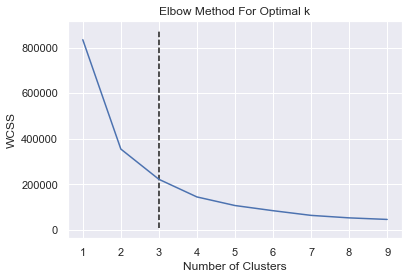

In [318]:
# USING SEABORN
# sb.scatterplot(x="Clusters",y="WCSS",data = mycenters)
plt.plot(number_clusters,wcss)
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.vlines(kneedle.knee,plt.ylim()[0],plt.ylim()[1], linestyles='dashed')
plt.show()

<hr>

## 3.
Create and visualize the k-means clustering with the `“k”` value obtained in `Q2`. The clustering algorithm ultimately groups similar patients by matching its features. Thus, for the visualization, draw the scatter plot using the `age` and `cholesterol` features on each cluster group and label them as `“Group-A”`, `“Group-B”` etc., (2 marks)

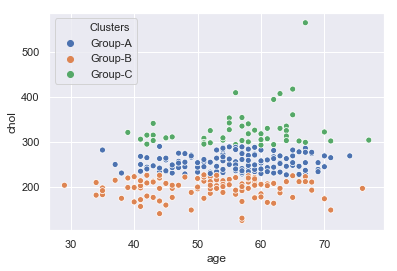

In [329]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans = kmeans.fit(heartDiseaseData[['age','chol']])
heartDiseaseData['Clusters'] = kmeans.labels_
legend_map = {0:'Group-A',1:'Group-B',2:'Group-C'}
sb.scatterplot(x=heartDiseaseData['age'],y=heartDiseaseData['chol'],hue = heartDiseaseData['Clusters'].map(legend_map),data=heartDiseaseData)

<hr>

## 4.
Plot a dendrogram using Python `scipy.cluster.hierarchy` method. (1 marks)


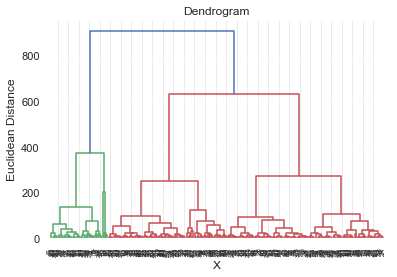

In [320]:
import scipy.cluster.hierarchy as sch
X = heartDiseaseData[['age','chol']].values

dendogram = sch.dendrogram(sch.linkage(X,method ='ward'))
plt.title('Dendrogram')
plt.xlabel('X')
plt.ylabel("Euclidean Distance")
plt.show()

<hr>

## 5.
Create the `agglomerative clustering` with the number of clusters is equal to the `“k”` value obtained in Question-2. Visualize the clusters similar to Question-2. (2 marks)

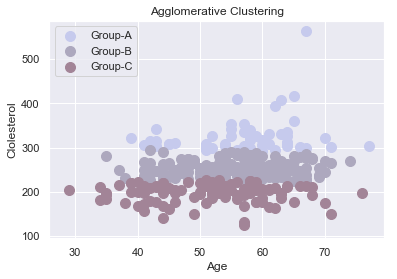

In [330]:
from sklearn.cluster import AgglomerativeClustering
X = heartDiseaseData[['age','chol']].values
hc = AgglomerativeClustering(n_clusters = 3, affinity ='euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X)
#visualizing clusters

plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, c = '#C6CAED',label ='Group-A')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 100, c = '#ADA8BE',label ='Group-B')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 100, c = '#A28497',label ='Group-C')
plt.title('Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Clolesterol')
plt.legend()
plt.show()


<hr>

## 6.
Compute `silhouette score` for both `K-means` and `agglomerative clustering` and tell us which clustering is better for the given dataset. (1 marks)

Silhouette score for k-means

In [322]:
from sklearn.metrics import silhouette_score

kScore = silhouette_score(X,kmeans.labels_)
print('Silhouette Score: %.3f' %kScore)

Silhouette Score: 0.469


Silhouette score for agglomerative clustering

In [323]:
agg_Score =silhouette_score(X,y_hc)
print('Silhouette Score: %.3f' %agg_Score)

Silhouette Score: 0.467


Silhouette Score of `1` indicates that clusters are `very dense` and `nicely separated` whereas `0` means that the clusters are `overlapping`. `Less than 0` means that the data belonging to the clusters are `incorrect`. <br><br>

Based on our calculations of the silhouette scores using `kmeans` and `agglomerative clustering`, we can see that the scores are very similar. If we round the answers to 2 decimals places they are exactly the same (`0.47`).
<br><br>
<u>**`kmeans clustering`**</u> is slightly higher so we can conclude that it is better fit *(if we had to pick one method only)* 
